In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pathlib import Path
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import warnings 
warnings.simplefilter("ignore")
import seaborn as sns

# Reflect Tables into SQLAlchemy ORM

In [2]:
# create engine to hawaii.sqlite
Base = automap_base()
# Create a reference to the dataset
database_path = Path("../Resources/hawaii.sqlite")
# Create Database Connection
engine = create_engine(f"sqlite:///{database_path}")
Base.metadata.create_all(engine)

In [3]:
conn = engine.connect()

In [4]:
# reflect an existing database into a new model
hstations_df = pd.read_sql("SELECT * FROM station", conn)
hmeasurements_df = pd.read_sql("SELECT * FROM measurement", conn)

# reflect the tables
hstations_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [5]:
hmeasurements_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [6]:
# View all of the classes that automap found
Base.prepare(engine, reflect=True)
all_classes = Base.classes.keys()
print(all_classes)


['station', 'measurement']


In [7]:
# Save references to each table
hmeasurements_df
hstations_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
hmeasurements_df['date'].max()


'2017-08-23'

In [10]:
hmeasurements_df['date'].dtypes

dtype('O')

In [11]:
hmeasurements_df['date'] = pd.to_datetime(hmeasurements_df['date'], errors='coerce')

In [12]:
hmeasurements_df['date'].dtypes

dtype('<M8[ns]')

In [13]:
hmeasurements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       19550 non-null  int64         
 1   station  19550 non-null  object        
 2   date     19550 non-null  datetime64[ns]
 3   prcp     18103 non-null  float64       
 4   tobs     19550 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 763.8+ KB


In [14]:
#data column data type check after conversion
hmeasurements_df['date'][0]

Timestamp('2010-01-01 00:00:00')

In [15]:
#lambda functions added to created yea, month, and day columns based off the date field
hmeasurements_df['Year'] = hmeasurements_df['date'].apply(lambda date: date.year)
hmeasurements_df['Month'] = hmeasurements_df['date'].apply(lambda date: date.month)
hmeasurements_df['Day'] = hmeasurements_df['date'].apply(lambda date: date.day)
hmeasurements_df['Day of week'] = hmeasurements_df['date'].apply(lambda date: date.dayofweek)

In [16]:
#mapping the days and createing the day of the week field
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
hmeasurements_df['Day of week'] = hmeasurements_df['Day of week'].map(dmap)

In [17]:
hmeasurements_df.head(10)

,id,station,date,prcp,tobs,Year,Month,Day,Day of week
0,1,USC00519397,2010-01-01,0.08,65.0,2010,1,1,Fri
1,2,USC00519397,2010-01-02,0.00,63.0,2010,1,2,Sat
2,3,USC00519397,2010-01-03,0.00,74.0,2010,1,3,Sun
3,4,USC00519397,2010-01-04,0.00,76.0,2010,1,4,Mon
4,5,USC00519397,2010-01-06,NaN,73.0,2010,1,6,Wed
5,6,USC00519397,2010-01-07,0.06,70.0,2010,1,7,Thu
6,7,USC00519397,2010-01-08,0.00,64.0,2010,1,8,Fri
7,8,USC00519397,2010-01-09,0.00,68.0,2010,1,9,Sat
8,9,USC00519397,2010-01-10,0.00,73.0,2010,1,10,Sun
9,10,USC00519397,2010-01-11,0.01,64.0,2010,1,11,Mon


In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Filter for the last 12 months
reference_date = pd.to_datetime('2017-08-23')
query_last_year = hmeasurements_df[(hmeasurements_df['date'] >= reference_date - pd.DateOffset(months=12)) & (hmeasurements_df['date'] <= reference_date)]
query_last_year.groupby('Month').count()

,id,station,date,prcp,tobs,Year,Day,Day of week
Month,,,,,,,,
1,191,191,191,170,191,191,191,191
2,177,177,177,162,177,177,177,177
3,189,189,189,169,189,189,189,189
4,190,190,190,171,190,190,190,190
5,174,174,174,167,174,174,174,174
6,191,191,191,171,191,191,191,191
7,194,194,194,176,194,194,194,194
8,150,150,150,134,150,150,150,150
9,190,190,190,173,190,190,190,190


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
hresult = hmeasurements_df.groupby('station')['Year'].count().reset_index(name='count')
hresult = hresult.sort_values(by='count', ascending=False)
hmost_stations = hresult[['station', 'count']]
hmost_stations


,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [20]:
hmeasurements_df['date'].max()

Timestamp('2017-08-23 00:00:00')

In [21]:
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_last_year.groupby(['Month']).count()

,id,station,date,prcp,tobs,Year,Day,Day of week
Month,,,,,,,,
1,191,191,191,170,191,191,191,191
2,177,177,177,162,177,177,177,177
3,189,189,189,169,189,189,189,189
4,190,190,190,171,190,190,190,190
5,174,174,174,167,174,174,174,174
6,191,191,191,171,191,191,191,191
7,194,194,194,176,194,194,194,194
8,150,150,150,134,150,150,150,150
9,190,190,190,173,190,190,190,190


In [22]:
# Perform a query to retrieve the data and precipitation scores


In [23]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
query_last_year.sort_values(ascending=True, by='date')

,id,station,date,prcp,tobs,Year,Month,Day,Day of week
2363,2364,USC00519397,2016-08-23,0.00,81.0,2016,8,23,Tue
8824,8825,USC00517948,2016-08-23,NaN,80.0,2016,8,23,Tue
14607,14608,USC00519281,2016-08-23,1.79,77.0,2016,8,23,Tue
7330,7331,USC00514830,2016-08-23,0.05,80.0,2016,8,23,Tue
5090,5091,USC00513117,2016-08-23,0.15,76.0,2016,8,23,Tue
...,...,...,...,...,...,...,...,...,...
12185,12186,USC00519523,2017-08-22,0.00,82.0,2017,8,22,Tue
7634,7635,USC00514830,2017-08-23,0.00,82.0,2017,8,23,Wed
2723,2724,USC00519397,2017-08-23,0.00,81.0,2017,8,23,Wed
12186,12187,USC00519523,2017-08-23,0.08,82.0,2017,8,23,Wed


[Text(17045.0, 0, '2016-09'),
 Text(17106.0, 0, '2016-11'),
 Text(17167.0, 0, '2017-01'),
 Text(17226.0, 0, '2017-03'),
 Text(17287.0, 0, '2017-05'),
 Text(17348.0, 0, '2017-07'),
 Text(17410.0, 0, '2017-09')]

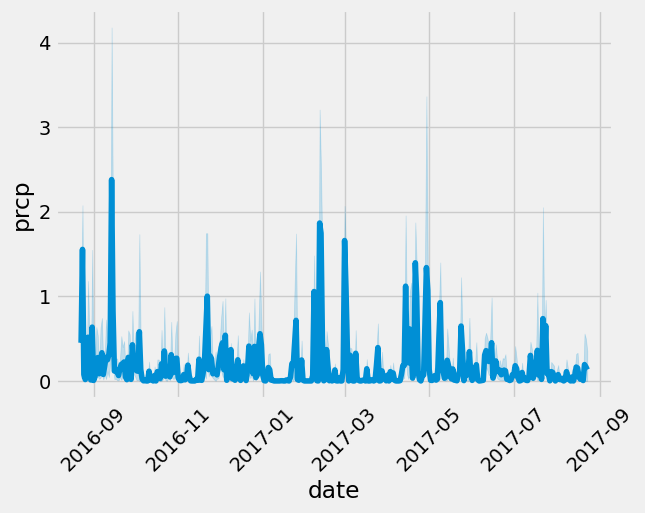

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
plot1 = sns.lineplot(data=query_last_year, x='date', y='prcp')
plot1.set_xticklabels(plot1.get_xticklabels(),  rotation=45)

In [25]:
query_last_year['prcp'].max()

6.7

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats_df = pd.DataFrame({
    'Count': [query_last_year['prcp'].count()],
    'Mean': [query_last_year['prcp'].mean()],
    'Std': [query_last_year['prcp'].std()],
    'Min': [query_last_year['prcp'].min()],
    '25%': [query_last_year['prcp'].quantile(0.25)],
    '50%': [query_last_year['prcp'].median()],
    '75%': [query_last_year['prcp'].quantile(0.75)],
    'Max': [query_last_year['prcp'].max()]
})

stats_df


,Count,Mean,Std,Min,25%,50%,75%,Max
0,2021,0.177279,0.46119,0.0,0.0,0.02,0.13,6.7


In [27]:
stats_df = pd.DataFrame({
    'Statistics': ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max'],
    'Precipitation': [
        query_last_year['prcp'].count(),
        query_last_year['prcp'].mean(),
        query_last_year['prcp'].std(),
        query_last_year['prcp'].min(),
        query_last_year['prcp'].quantile(0.25),
        query_last_year['prcp'].median(),
        query_last_year['prcp'].quantile(0.75),
        query_last_year['prcp'].max()
    ]
})

stats_df

,Statistics,Precipitation
0,Count,2021.000000
1,Mean,0.177279
2,Std,0.461190
3,Min,0.000000
4,25%,0.000000
5,50%,0.020000
6,75%,0.130000
7,Max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
hmeasurements_df['station'].nunique()


9

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
hresult = hmeasurements_df.groupby('station')['Year'].count().reset_index(name='count')
hresult = hresult.sort_values(by='count', ascending=False)
sel_cols = hresult[['station', 'count']]
sel_cols

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [30]:
query_last_year.head()

,id,station,date,prcp,tobs,Year,Month,Day,Day of week
2363,2364,USC00519397,2016-08-23,0.00,81.0,2016,8,23,Tue
2364,2365,USC00519397,2016-08-24,0.08,79.0,2016,8,24,Wed
2365,2366,USC00519397,2016-08-25,0.08,80.0,2016,8,25,Thu
2366,2367,USC00519397,2016-08-26,0.00,79.0,2016,8,26,Fri
2367,2368,USC00519397,2016-08-27,0.00,77.0,2016,8,27,Sat


In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

tobs_stats_df = pd.DataFrame({
    'Avg': [query_last_year['tobs'].mean()],
    'Max': [query_last_year['tobs'].max()],
    'Min': [query_last_year['tobs'].min()],
})

#Rounding Columns
tobs_stats_df = tobs_stats_df.round(2)
tobs_stats_df


,Avg,Max,Min
0,74.59,87.0,58.0


<Axes: ylabel='Frequency'>

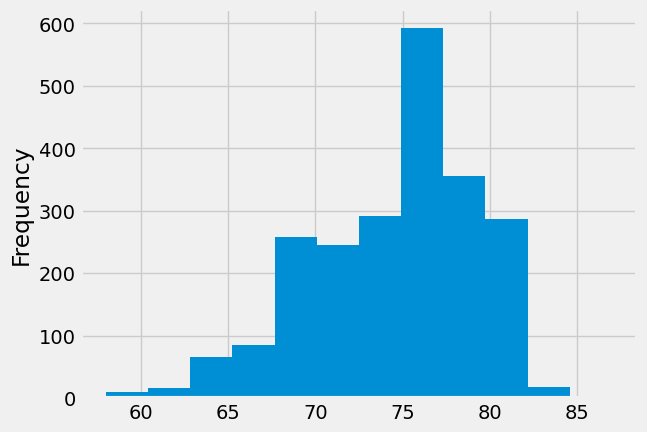

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_last_year['tobs'].plot.hist(bins=12)

<Axes: xlabel='tobs', ylabel='prcp'>

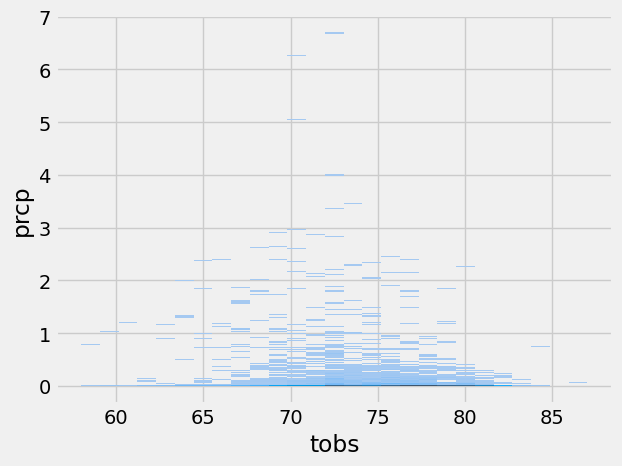

In [34]:
sns.histplot(x='tobs', y='prcp', data=query_last_year)

# Close Session

In [ ]:
# Close Session
session.close()